# Lang
## Details
> Lange titels zouden beter werken dan korte, omdat
ze meer informatie kunnen doorspelen via de kop
aan de lezers. Onder korte koppen verstaan we in
deze studie krantenkoppen die minder dan 76 tekens
(inclusief spaties) bevatten. Lange krantenkoppen
zijn dan koppen die uit 76 of meer tekens bestaan.
## Data

In [1]:
from util import get_cls_train_test

train_x, train_y, test_x, test_y = get_cls_train_test("Lang")
train_y.value_counts()

1    449
0    232
Name: Lang, dtype: int64

## Approach 1: Hardcoded
Lang has a clear description (#chars > 76), so can probably be easily manually implemented.

In [2]:
def is_long_headline(headline):
    return len(headline) >= 76

print(is_long_headline("Doel: Vandeput een hak zetten. Resultaat: Crombez in z'n hemd gezet"))
print(is_long_headline(
    "Vermoedelijk vervalste mails brengen Crombez (SP.A) in verlegenheid: \"Ik had ze beter niet gebruikt\""))

False
True


f-score: 0.9833887043189369
Confusion matrix: (TP: 75, FP: 5, FN: 0, TN: 148)
Accuracy=97.81% (223/228)


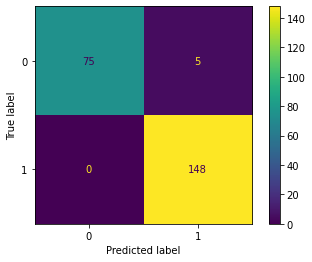

In [3]:
import numpy as np
from util import print_evaluation
prediction = np.vectorize(is_long_headline)(test_x)
print_evaluation(test_y, prediction)

Still strange that there are still some false positives. This are misclassifcations in the dataset. (mainly when length is 76)

## Approach 2: Length as feature

f-score: 0.9794520547945206
Confusion matrix: (TP: 79, FP: 1, FN: 5, TN: 143)
Accuracy=97.37% (222/228)


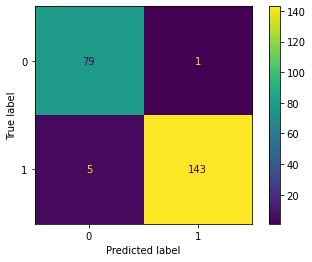

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from util import FunctionTransformer

model = Pipeline([
    ('length_counter', FunctionTransformer(func=lambda x: len(x))),
    ('classifier', LogisticRegression())
])

model.fit(train_x, train_y)

prediction = model.predict(test_x)
print_evaluation(test_y, prediction)

A slightly worse result than Approach 1.